# **Caso: ¿Quién sobrevive al Titanic?**

Todos los datos utilizados en esta clase se pueden encontrar en la siguiente competencia de Kaggle: **https://www.kaggle.com/c/titanic**

## Entendimiento del negocio

- El hundimiento del Titanic es uno de los accidentes náuticos más conocidos de la historia. 
- Fallecieron **1,502** personas de los **2,224** pasajeros. 
- Una de las principales causas es que no existían botes salvavidas suficientes para los pasajeros y la tripulación.
- Descubriremos algunos **factores relevantes** para la supervivencia de los pasajeros
- Nuestro objetivo es obtener una **probabilidad de supervivencia** y podremos responder a la siguiente pregunta: ¿hubiéramos sobrevivido en el Titanic?

## Comprensión de los datos

Leemos los datos (train y test) a partir de archivos CSV(Comma Separated Values).

In [7]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(2)

,IdPasajero,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
test.head(2)

,IdPasajero,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
test.head()

,id,clase,nombre,sexo,edad,hermanos_esposos,padres_hijos,ticket,tarifa,cabina,puerto_embarque
892,3,Kelly,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
893,3,Wilkes,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7,NaN,S
894,2,Myles,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
895,3,Wirz,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S
896,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S


Visualizamos el tamaño de la data contenida en ambos archivos a través del método **shape**

In [2]:
train.shape, test.shape

((891, 12), (418, 11))

A fin de comprobar que la data ha sido importada de forma correcta ejecutamos el método **head** para train y test por separado.

In [3]:
train.head(3)

,id,sobrevivio,clase,nombre,sexo,edad,hermanos_esposos,padres_hijos,ticket,tarifa,cabina,puerto_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,id,clase,nombre,sexo,edad,hermanos_esposos,padres_hijos,ticket,tarifa,cabina,puerto_embarque
892,3,Kelly,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
893,3,Wilkes,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7,NaN,S
894,2,Myles,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q


Mostrar el tipo de datos de las variables

In [5]:
train.dtypes

id                    int64
sobrevivio            int64
clase                 int64
nombre               object
sexo                 object
edad                float64
hermanos_esposos      int64
padres_hijos          int64
ticket               object
tarifa              float64
cabina               object
puerto_embarque      object
dtype: object

## Preprocesamiento de los datos

Mostrar las columnas con datos faltantes y el porcentaje de los mismos

In [0]:
def valores_perdidos (tabla): 
        total_nulos = tabla.isnull().sum()
        porcentaje_nulos = 100 * tabla.isnull().sum()/len(tabla)
        tabla_nulos = pd.concat([total_nulos, porcentaje_nulos], axis=1)
        tabla_nulos_nombres = tabla_nulos.rename(columns = {0 : 'total_nulos', 1 : '% nulos'})
        return tabla_nulos_nombres [tabla_nulos_nombres['total_nulos'] != 0].sort_values('total_nulos', ascending=False)

In [7]:
valores_perdidos(train)

,total_nulos,% nulos
cabina,687,77.104377
edad,177,19.865320
puerto_embarque,2,0.224467


In [8]:
valores_perdidos(test)

,total_nulos,% nulos
cabina,306,73.205742
edad,78,18.660287
tarifa,22,5.263158
puerto_embarque,22,5.263158
sexo,8,1.913876


**ms.matrix** (librería missingno): Grafica cada columna dejando espacios donde aparezcan valores perdidos.

Es más intuitivo y fácil de mapear, pero es dificil de visualizar si contamos con muchas columnas

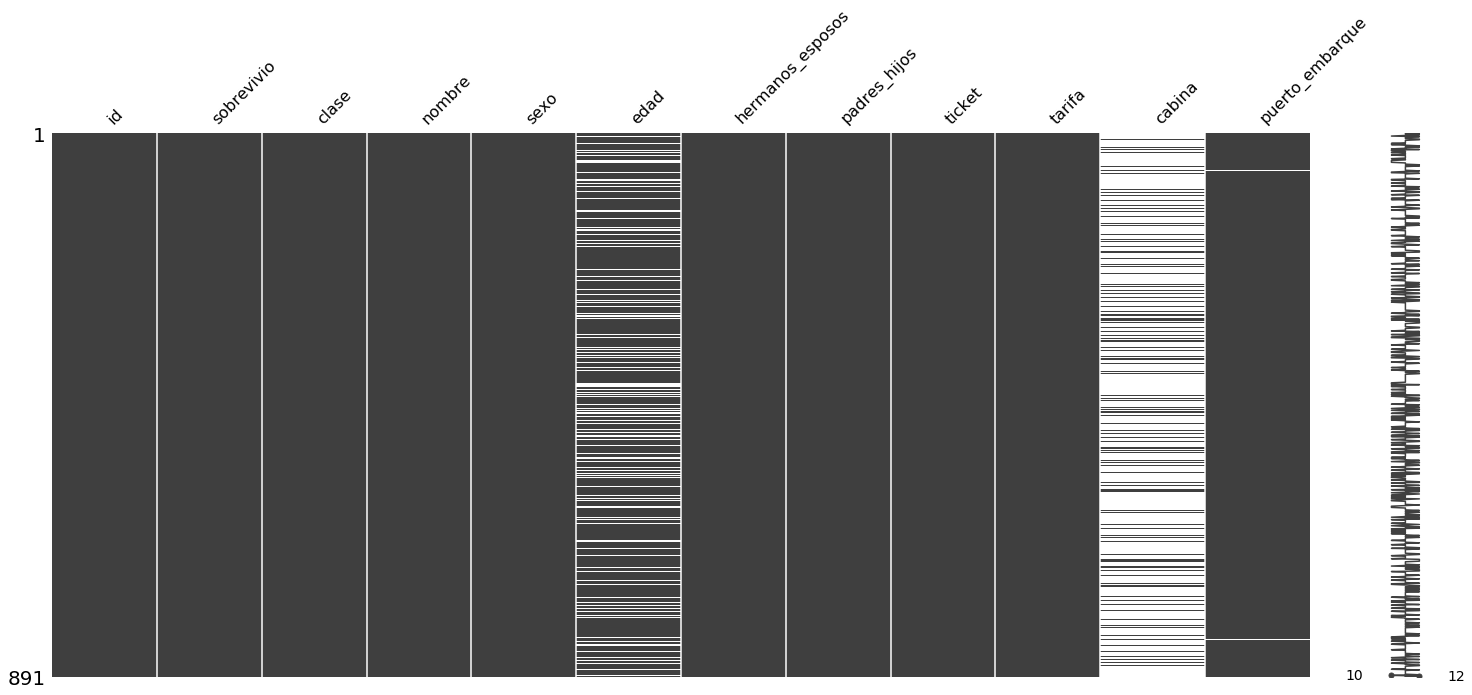

In [9]:
import missingno as ms
ms.matrix(train)

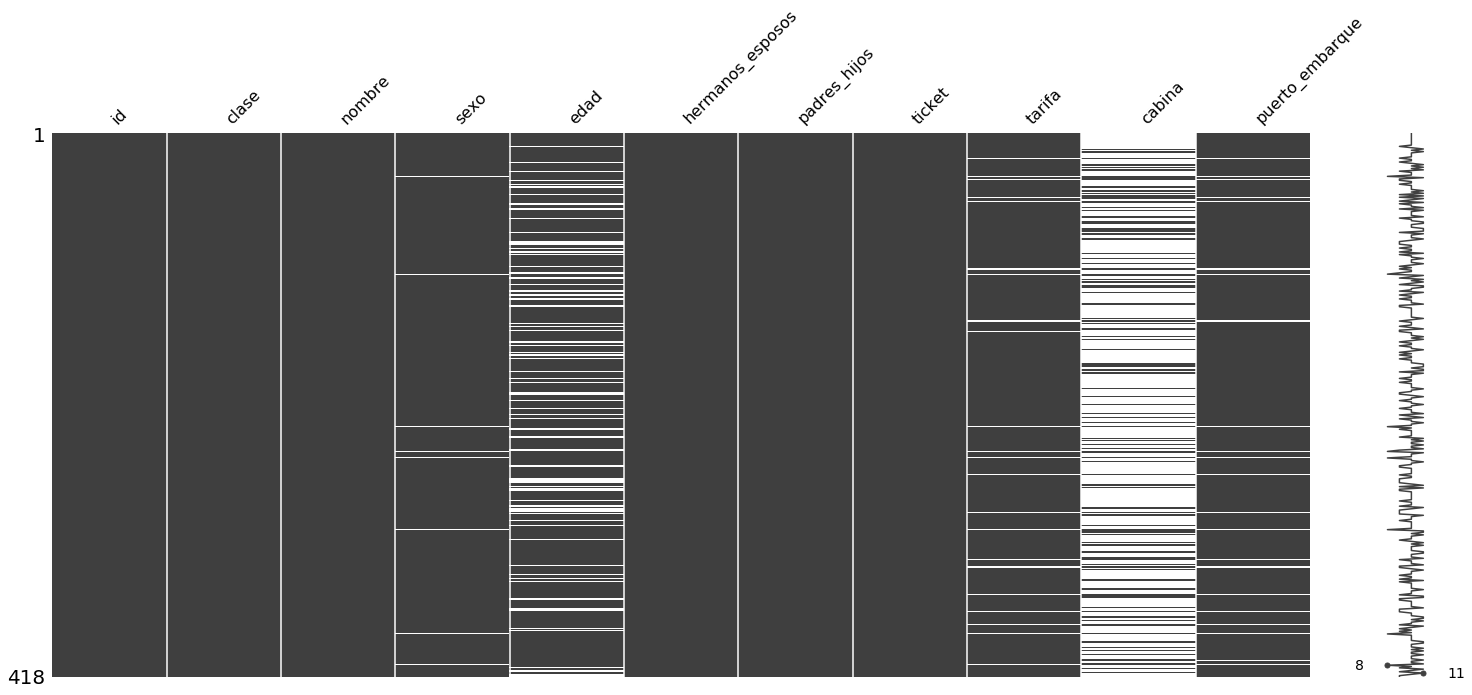

In [10]:
ms.matrix(test)

Reemplazamos los datos faltantes según el tipo de dato en cada columna:

1.   Si el tipo de dato es **numérico** (int64, float64) procedemos a reemplazarlo por la **media**
2.   Si el tipo de dato **no es numérico** (object) procedemos a reemplazarlo por la **moda**



In [0]:
train['cabina'].fillna(train['cabina'].mode()[0], inplace=True)
train['edad'].fillna(train['edad'].mean(), inplace=True)
train['puerto_embarque'].fillna(train['puerto_embarque'].mode()[0], inplace=True)

In [0]:
test['cabina'].fillna(train['cabina'].mode()[0], inplace=True)
test['tarifa'].fillna(train['tarifa'].mean(), inplace=True)
test['edad'].fillna(train['edad'].mean(), inplace=True)
test['puerto_embarque'].fillna(train['puerto_embarque'].mode()[0], inplace=True)
test['sexo'].fillna(train['sexo'].mode()[0], inplace=True)

In [14]:
valores_perdidos(test)

,total_nulos,% nulos


Detectando y reemplazando outliers:

1.   Realizamos un gráfico de boxplot para identificar valores fuera de la dispersión normal de la data. **Este método solo se aplica a variables numéricas**
2.   Reemplazaremos estos valores, si lo hubiera, por el **percentil 95**



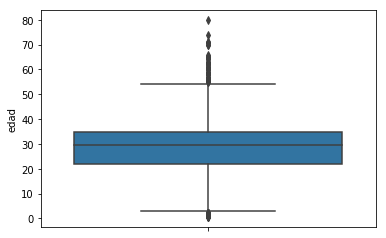

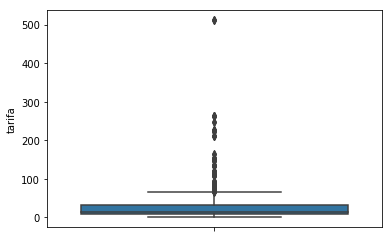

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(train['edad'], orient="v")
plt.show()
sns.boxplot(train['tarifa'], orient='v')
plt.show()

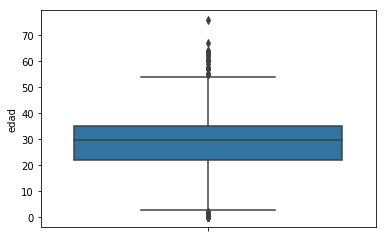

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(test['edad'], orient="v")
plt.show()

In [0]:
outliers_a_reemplazar = train[train['edad'] > train['edad'].quantile(.95)].index
train.loc[outliers_a_reemplazar,'edad'] = train['edad'].quantile(.95)

In [0]:
outliers_a_reemplazar = train[train['tarifa'] > train['tarifa'].quantile(.95)].index
train.loc[outliers_a_reemplazar,'tarifa'] = train['tarifa'].quantile(.95)

In [0]:
outliers_a_reemplazar = test[test['edad'] > test['edad'].quantile(.95)].index
test.loc[outliers_a_reemplazar,'edad'] = test['edad'].quantile(.95)

Ingeniería de características:

1.   Evaluamos según la lógica del problema **qué variables podrían impactar directamente en nuestro objetivo a predecir**. En este caso la supervivencia.
2.   Reemplazaremos estas variables, si lo hubiera, por valors **numéricos** que ayuden al modelo a brindarle mayor importancia para la predicción



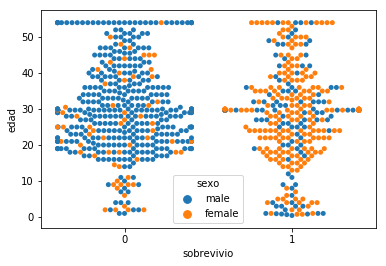

In [20]:
sns.swarmplot(x='sobrevivio',y='edad',data=train,hue='sexo')

In [0]:
sns.countplot(x = 'puerto_embarque', data = train[train['sobrevivio'] == 0])

In [0]:
palabras_a_numeros = {"puerto_embarque":  {"S": 0, "Q":1, "C": 2},"sexo": {"male":0,"female":1}}

In [0]:
train.replace(palabras_a_numeros, inplace = True)

In [25]:
train.head(15)

,id,sobrevivio,clase,nombre,sexo,edad,hermanos_esposos,padres_hijos,ticket,tarifa,cabina,puerto_embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,B96 B98,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,B96 B98,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,B96 B98,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,B96 B98,2


In [0]:
test.replace(palabras_a_numeros, inplace = True)

In [26]:
test.head(15)

,id,clase,nombre,sexo,edad,hermanos_esposos,padres_hijos,ticket,tarifa,cabina,puerto_embarque
892,3,Kelly,Mr. James,0,34.500000,0,0,330911,7.8292,B96 B98,1
893,3,Wilkes,Mrs. James (Ellen Needs),1,47.000000,1,0,363272,7,B96 B98,0
894,2,Myles,Mr. Thomas Francis,0,55.000000,0,0,240276,9.6875,B96 B98,1
895,3,Wirz,Mr. Albert,0,27.000000,0,0,315154,8.6625,B96 B98,0
896,3,Hirvonen,Mrs. Alexander (Helga E Lindqvist),1,22.000000,1,1,3101298,12.2875,B96 B98,0
897,3,Svensson,Mr. Johan Cervin,0,14.000000,0,0,7538,9.225,B96 B98,0
898,3,Connolly,Miss. Kate,1,30.000000,0,0,330972,7.6292,B96 B98,1
899,2,Caldwell,Mr. Albert Francis,0,26.000000,1,1,248738,29,B96 B98,0
900,3,Abrahim,Mrs. Joseph (Sophie Halaut Easu),1,18.000000,0,0,2657,7.2292,B96 B98,2
901,3,Davies,Mr. John Samuel,0,21.000000,2,0,A/4 48871,24.15,B96 B98,0


Estandarizando la data:

1.   Seleccionamos aquellas variables **numéricas** que presenten un comportamiento alejado a la distribución normal.
2.   Estandarizamos estas variables, si lo hubiera, para uniformizar la data lista para ingresar al modelo.



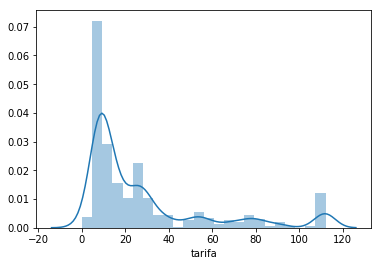

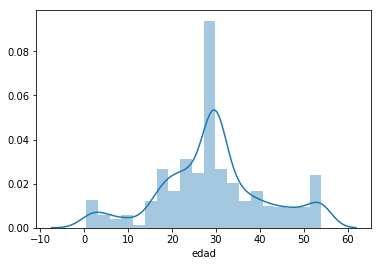

In [27]:
sns.distplot(train['tarifa'])
plt.show()
sns.distplot(train['edad'])
plt.show()

Transformación BoxCox


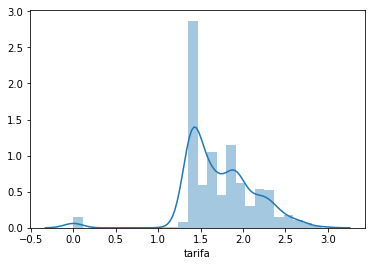

In [56]:
from scipy.special import boxcox1p
train['tarifa'] = boxcox1p(train['tarifa'], 0.15)
sns.distplot(train['tarifa'])

Transformación Logarítmica


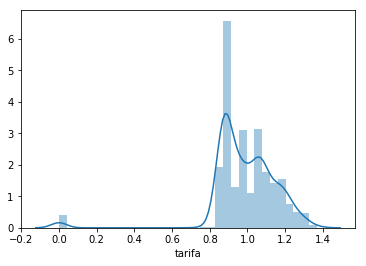

In [57]:
import numpy as np
sns.distplot(np.log1p(train['tarifa']))